In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, fbeta_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from pandas import read_csv
import IPython
from IPython.display import display
%matplotlib inline

In [2]:
df = read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [3]:
df.drop(['Time'], axis=1, inplace=True)
df.head()

,Date,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   CO_GT         9357 non-null   float64
 2   PT08_S1_CO    9357 non-null   int64  
 3   NMHC_GT       9357 non-null   int64  
 4   C6H6_GT       9357 non-null   float64
 5   PT08_S2_NMHC  9357 non-null   int64  
 6   Nox_GT        9357 non-null   int64  
 7   PT08_S3_Nox   9357 non-null   int64  
 8   NO2_GT        9357 non-null   int64  
 9   PT08_S4_NO2   9357 non-null   int64  
 10  PT08_S5_O3    9357 non-null   int64  
 11  T             9357 non-null   float64
 12  RH            9357 non-null   float64
 13  AH            9357 non-null   float64
 14  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Date            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [6]:
df.dtypes

Date             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
dtype: object

In [7]:
df['CO_level']

0       Very High
1       Very High
2       Very High
3       Very High
4       Very High
          ...    
9352     Very low
9353     Very low
9354     Very low
9355     Very low
9356     Very low
Name: CO_level, Length: 9357, dtype: object

In [8]:
df['CO_level'].value_counts()

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

In [9]:
df.replace({'CO_level':{'Very low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}}, inplace=True)
df.head()

,Date,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,4
1,11/23/2004,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,4
2,11/17/2004,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,4
3,11/23/2004,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,4
4,11/26/2004,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,4


In [10]:
df.dtypes

Date             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level          int64
dtype: object

In [11]:
df['CO_level'] = df['CO_level'].astype(float)

In [12]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
#df['Date'] = df['Date'].astype(int) // 10**9  # Convert nanoseconds to seconds

# Now, you can convert Unix timestamps to floats if needed
#df['Date'] = df['Date'].astype(float)

In [14]:
df.drop(['Date'], axis=1, inplace=True)

In [15]:
#df['Date'] = df['Date'].astype(float)

In [16]:
df.dtypes

CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level        float64
dtype: object

In [17]:
df.corr()['CO_level']

CO_GT           0.806972
PT08_S1_CO      0.202281
NMHC_GT         0.157228
C6H6_GT        -0.006655
PT08_S2_NMHC    0.250478
Nox_GT          0.627592
PT08_S3_Nox    -0.340432
NO2_GT          0.691575
PT08_S4_NO2     0.068043
PT08_S5_O3      0.295170
T              -0.074737
RH             -0.080428
AH             -0.067333
CO_level        1.000000
Name: CO_level, dtype: float64

In [18]:
cor = df.corr()
cor_feature = cor['CO_level'].sort_values(ascending = False).to_frame()
cor_feature.style.background_gradient(cmap='BrBG_r')

,CO_level
CO_level,1.000000
CO_GT,0.806972
NO2_GT,0.691575
Nox_GT,0.627592
PT08_S5_O3,0.295170
PT08_S2_NMHC,0.250478
PT08_S1_CO,0.202281
NMHC_GT,0.157228
PT08_S4_NO2,0.068043
C6H6_GT,-0.006655


<Axes: xlabel='CO_level', ylabel='Count'>

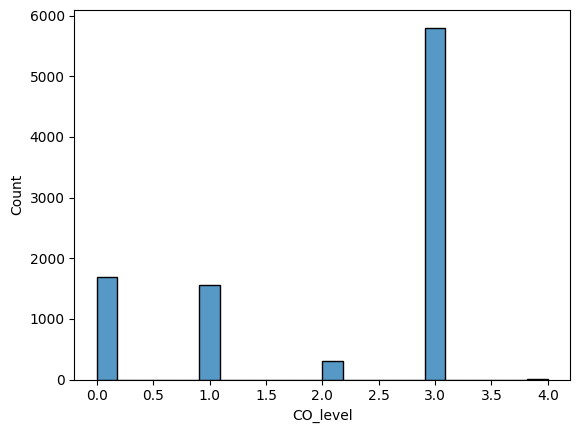

In [19]:
sns.histplot(df['CO_level'])

<Axes: ylabel='Density'>

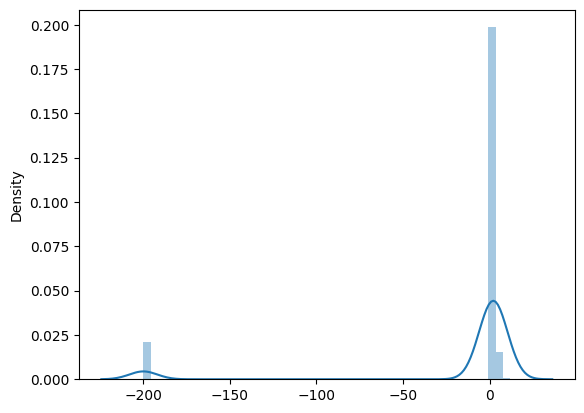

In [20]:
sns.distplot(df[['CO_level', 'CO_GT']])

In [21]:
df.corr().style.background_gradient(cmap='GnBu')

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,0.806972
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,0.202281
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,0.157228
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,-0.006655
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,0.250478
Nox_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,0.627592
PT08_S3_Nox,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.340432
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,0.691575
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,0.068043
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.295170


In [22]:
X = df.drop(['CO_level'], axis=1)

X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979


In [23]:
y = df['CO_level']
y.head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: CO_level, dtype: float64

In [24]:
columns=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,0.593763,2.907720,-0.29267,1.177783,3.170778,4.740822,-1.459704,1.275084,2.505474,2.991654,0.060686,0.687605,0.202996
1,0.588612,2.634840,-0.29267,1.148782,3.106510,4.620397,-1.428646,1.038740,2.323533,2.761851,0.039853,0.716895,0.201927
2,0.571871,2.283128,-0.29267,1.107698,3.007186,2.250729,-1.363424,1.054497,1.805538,3.232400,0.090777,0.259983,0.196590
3,0.571871,2.828888,-0.29267,1.151199,3.109431,4.663128,-1.469021,1.330231,2.449822,3.087952,0.079203,0.646601,0.203497
4,0.570583,2.750056,-0.29267,1.047279,2.869885,4.740822,-1.391376,1.550819,2.026007,3.260852,0.132443,0.455244,0.203607


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=123)

Feature Transformation
Feature transformation is a mathematical transformation in which we apply a mathematical formula to data and transform 
the values which are useful for our further analysis.

In [26]:
polynomialfeatures=PolynomialFeatures()
X_train=polynomialfeatures.fit_transform(X_train)
X_test=polynomialfeatures.transform(X_test)

# Developing Hybrid Model

In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor, StackingRegressor, GradientBoostingRegressor
import lightgbm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [28]:
base_models = [
    ('catboost', CatBoostRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=110, random_state=42)),
    ('HistGradBoost', HistGradientBoostingRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, criterion='squared_error',)),
    ('Light GBM', LGBMRegressor())
]

In [29]:
from sklearn.ensemble import StackingRegressor

In [30]:
# Define meta-model
meta_model = AdaBoostRegressor()

In [31]:
# Create a hybrid model
hybrid = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

In [32]:
# Train the stacking model
hybrid.fit(X_train, Y_train)


Learning rate set to 0.20824
0:	learn: 0.9848967	total: 73.5ms	remaining: 14.6s
1:	learn: 0.7827279	total: 110ms	remaining: 10.9s
2:	learn: 0.6288331	total: 124ms	remaining: 8.13s
3:	learn: 0.5005821	total: 132ms	remaining: 6.47s
4:	learn: 0.3985987	total: 147ms	remaining: 5.75s
5:	learn: 0.3179881	total: 161ms	remaining: 5.21s
6:	learn: 0.2544810	total: 174ms	remaining: 4.8s
7:	learn: 0.2039441	total: 182ms	remaining: 4.37s
8:	learn: 0.1643521	total: 197ms	remaining: 4.18s
9:	learn: 0.1332111	total: 238ms	remaining: 4.53s
10:	learn: 0.1089818	total: 262ms	remaining: 4.5s
11:	learn: 0.0894549	total: 275ms	remaining: 4.3s
12:	learn: 0.0737611	total: 289ms	remaining: 4.15s
13:	learn: 0.0618982	total: 308ms	remaining: 4.09s
14:	learn: 0.0521424	total: 322ms	remaining: 3.97s
15:	learn: 0.0444157	total: 343ms	remaining: 3.95s
16:	learn: 0.0383252	total: 355ms	remaining: 3.82s
17:	learn: 0.0336095	total: 367ms	remaining: 3.71s
18:	learn: 0.0297001	total: 378ms	remaining: 3.6s
19:	learn: 0.02

StackingRegressor(cv=5,
                  estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x12cee89d0>),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=110, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('HistGradBoost',
                               HistGradientBoostingRegressor()),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(criterion='squared_error')),
                              ('Light GBM', LGBMRegressor())],
                  final_estimator=AdaBoostRegressor())

In [33]:
# Make predictions
y_pred = hybrid.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
print(f'Stacking Model Mean Absolute Error: {mae}')

Stacking Model Mean Absolute Error: 0.0


In [34]:
print(f"Training accuracy: {hybrid.score(X_train, Y_train)*100:.0f}%")

Training accuracy: 100%


In [35]:
# Check model Accuracy
print(f"Testing Accuracy : {hybrid.score(X_test,Y_test)*100:.0f}%")

Testing Accuracy : 100%


In [36]:
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))

Mean Squared Error 0.00


When using stacking with AdaBoost as the meta-model and other boosting algorithms as base estimators, the process involves training various boosting algorithms initially and then combining their predictions through AdaBoost. Here’s a detailed step-by-step explanation of how this works:

### Key Components

1. **Base Estimators (Level-0 Models)**: These are the initial models used to make predictions. In this scenario, they are boosting algorithms such as:
   - Gradient Boosting
   - XGBoost
   - LightGBM
   - CatBoost

2. **Meta-Model (Level-1 Model)**: This is AdaBoost, which will be trained on the predictions of the base estimators.

### Stacking Process

1. **Training Base Estimators**:
   - Split the training data into \(k\) folds using cross-validation.
   - For each boosting algorithm (base estimator):
     - Train on \(k-1\) folds and predict on the remaining fold.
     - Rotate the process until every fold has been used as the validation set once.
   - Collect the out-of-fold predictions from each base estimator. These predictions form the new feature set for the meta-model.

2. **Creating Meta-Model Training Data**:
   - The out-of-fold predictions from each base estimator become the new features for training the meta-model.
   - The original target variable \(y\) remains unchanged.

3. **Training the Meta-Model (AdaBoost)**:
   - Use the out-of-fold predictions as features to train AdaBoost.
   - AdaBoost will learn how to combine these predictions to optimize the final output.

4. **Final Prediction**:
   - For new data, each base estimator makes a prediction.
   - The predictions from the base estimators are fed into the trained AdaBoost meta-model.
   - AdaBoost then provides the final prediction.

### Detailed Example

1. **Preparation**:
   - Assume a dataset with features \(X\) and target variable \(y\).

2. **Training Base Estimators**:
   - Split the dataset into 5 folds (for example).
   - For each base estimator (e.g., Gradient Boosting, XGBoost, LightGBM):
     - Train on 4 folds and predict on the 5th fold.
     - Rotate and repeat until each fold has been used as the validation set.
   - Collect all out-of-fold predictions. Suppose we have three boosting algorithms; this will result in three sets of predictions for each data point.

3. **Creating Meta-Model Training Data**:
   - The new features for the meta-model are the out-of-fold predictions from each of the base estimators.
   - The target variable \(y\) remains the same.

4. **Training the Meta-Model (AdaBoost)**:
   - Train AdaBoost using the out-of-fold predictions (new features) as input and \(y\) as the target variable.
   - AdaBoost will create a series of weak learners (typically decision stumps) and iteratively adjust the weights of the predictions to minimize the overall error.

5. **Making Final Predictions**:
   - For a new test data point:
     - Each base estimator (Gradient Boosting, XGBoost, LightGBM) makes a prediction.
     - These predictions are input to the trained AdaBoost meta-model.
     - AdaBoost outputs the final prediction.

### Benefits and Considerations

- **Benefits**:
  - **Combining Strengths**: Using various boosting algorithms as base estimators can capture diverse patterns and reduce individual model biases.
  - **Enhanced Performance**: AdaBoost as the meta-model can effectively combine the base models' predictions to improve overall accuracy.

- **Considerations**:
  - **Complexity**: The model can become complex and computationally intensive due to multiple stages of training.
  - **Overfitting**: There is a risk of overfitting, especially if the base models and the meta-model are very complex.

### Summary

Stacking with boosting algorithms as base estimators and AdaBoost as the meta-model involves training multiple boosting models, using their out-of-fold predictions to form a new dataset, and training AdaBoost on this new dataset. This method leverages the strengths of multiple boosting techniques and combines their predictions through AdaBoost, aiming to improve predictive performance and robustness.